In [1]:
#Assignment_4

In [2]:
#Question

'''

- Implement a basic hashing model from scratch that hashes the images.
- For a-hash, given any images, first resize the image to a suitable size,
followed by grayscale conversion of the image. Then mean normalize the 
image to obtain a binary image, whose sum can be used as a hash value.
- Using the hash model, encode all the images present inside your directory 
and then search for images similar to the query image.

'''

'\n\n- Implement a basic hashing model from scratch that hashes the images.\n- For a-hash, given any images, first resize the image to a suitable size,\nfollowed by grayscale conversion of the image. Then mean normalize the \nimage to obtain a binary image, whose sum can be used as a hash value.\n- Using the hash model, encode all the images present inside your directory \nand then search for images similar to the query image.\n\n'

In [3]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [4]:
folder = "./YALE"
images = []
for file in os.listdir(folder):
    img = mpimg.imread(os.path.join(folder, file))
    if img is not None:
        images.append(img)

In [5]:
image_vector = []
for image in images:
    row,col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec / np.linalg.norm(img_vec)  # Converting the image vector to a unit vector
    image_vector.append(img_vec_norm)

In [6]:
def genRandomHashVectors(m, length):  
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector    

In [7]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return ''.join(hash_code)   

In [8]:
hash_vector = genRandomHashVectors(20,len(image_vector[0]))
print(localSensitiveHashing(hash_vector,image_vector[0]))

10100111001101010100


In [10]:
image_dict = {}
for i in range(len(image_vector)):
    hash_code = localSensitiveHashing(hash_vector,image_vector[i])
    if hash_code not in image_dict.keys():
        image_dict[hash_code] = [i]
    else:
        image_dict[hash_code].append(i)   

In [11]:
print(image_dict)

{'10100111001101010100': [0], '10100010101101010100': [1, 27, 92], '10100011101101010100': [2, 11, 13, 32, 67, 77, 84, 101, 104, 132, 141, 158, 162], '10100010100011010100': [3, 18, 24, 159], '10100011100001010100': [4, 15, 48, 54, 91, 93], '10100011101001010100': [5, 10, 31, 33, 44, 46, 63, 88, 109, 124, 136, 137, 144, 155], '10100111101101010100': [6, 8], '10100011101011010100': [7, 86, 133], '10110111101001000100': [9], '10100010101001010100': [12, 34, 35, 53, 65, 94, 98, 135, 143], '10000010101111010100': [14], '10000111101001010100': [16, 50], '10000010001001011110': [17], '10100011100011010100': [19, 36, 40, 42, 74, 116, 118, 123, 146], '10100010101011010100': [20], '10000011101101010100': [21, 76, 80, 96, 120], '10100110101001010100': [22, 69], '10100011100101010100': [23, 70, 73, 157], '10110111001001010100': [25], '10100111011001010100': [26], '00100111101101010100': [28], '10100111101011010100': [29], '10100010001001010100': [30, 138], '00100111100001010100': [37], '001001111

In [12]:
keys = list(image_dict.keys())
values = list(image_dict.values())

In [13]:
def plotImages(images, img_indices):
    imgs = [images[i] for i in range(len(images)) if i in img_indices]
    fig = plt.figure()
    cols = 2
    n_images = len(imgs)
    for n,image in zip(range(n_images),imgs):
        ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.gray()
        plt.imshow(image)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

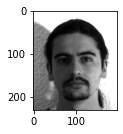

In [14]:
plotImages(images, values[0])

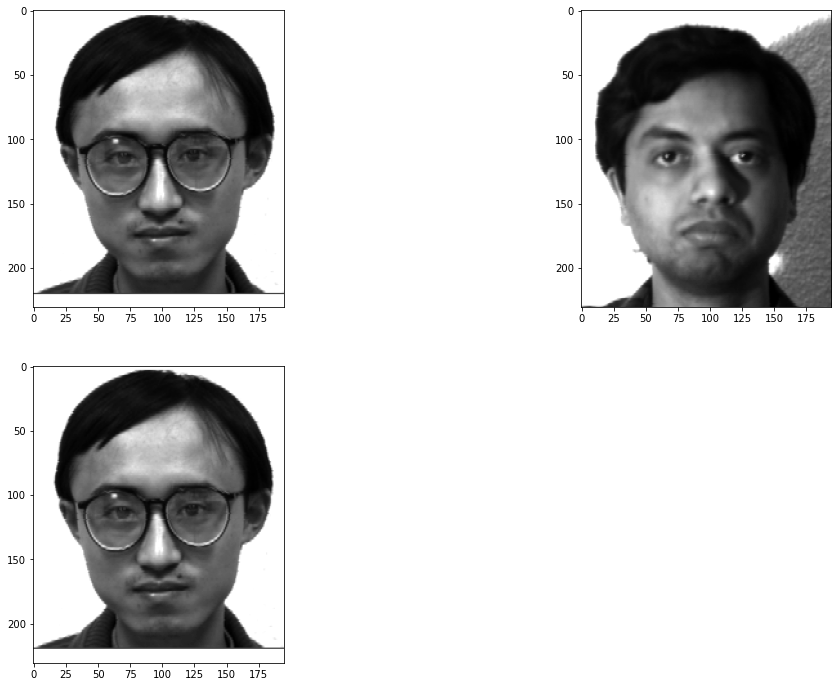

In [15]:
plotImages(images, values[1])

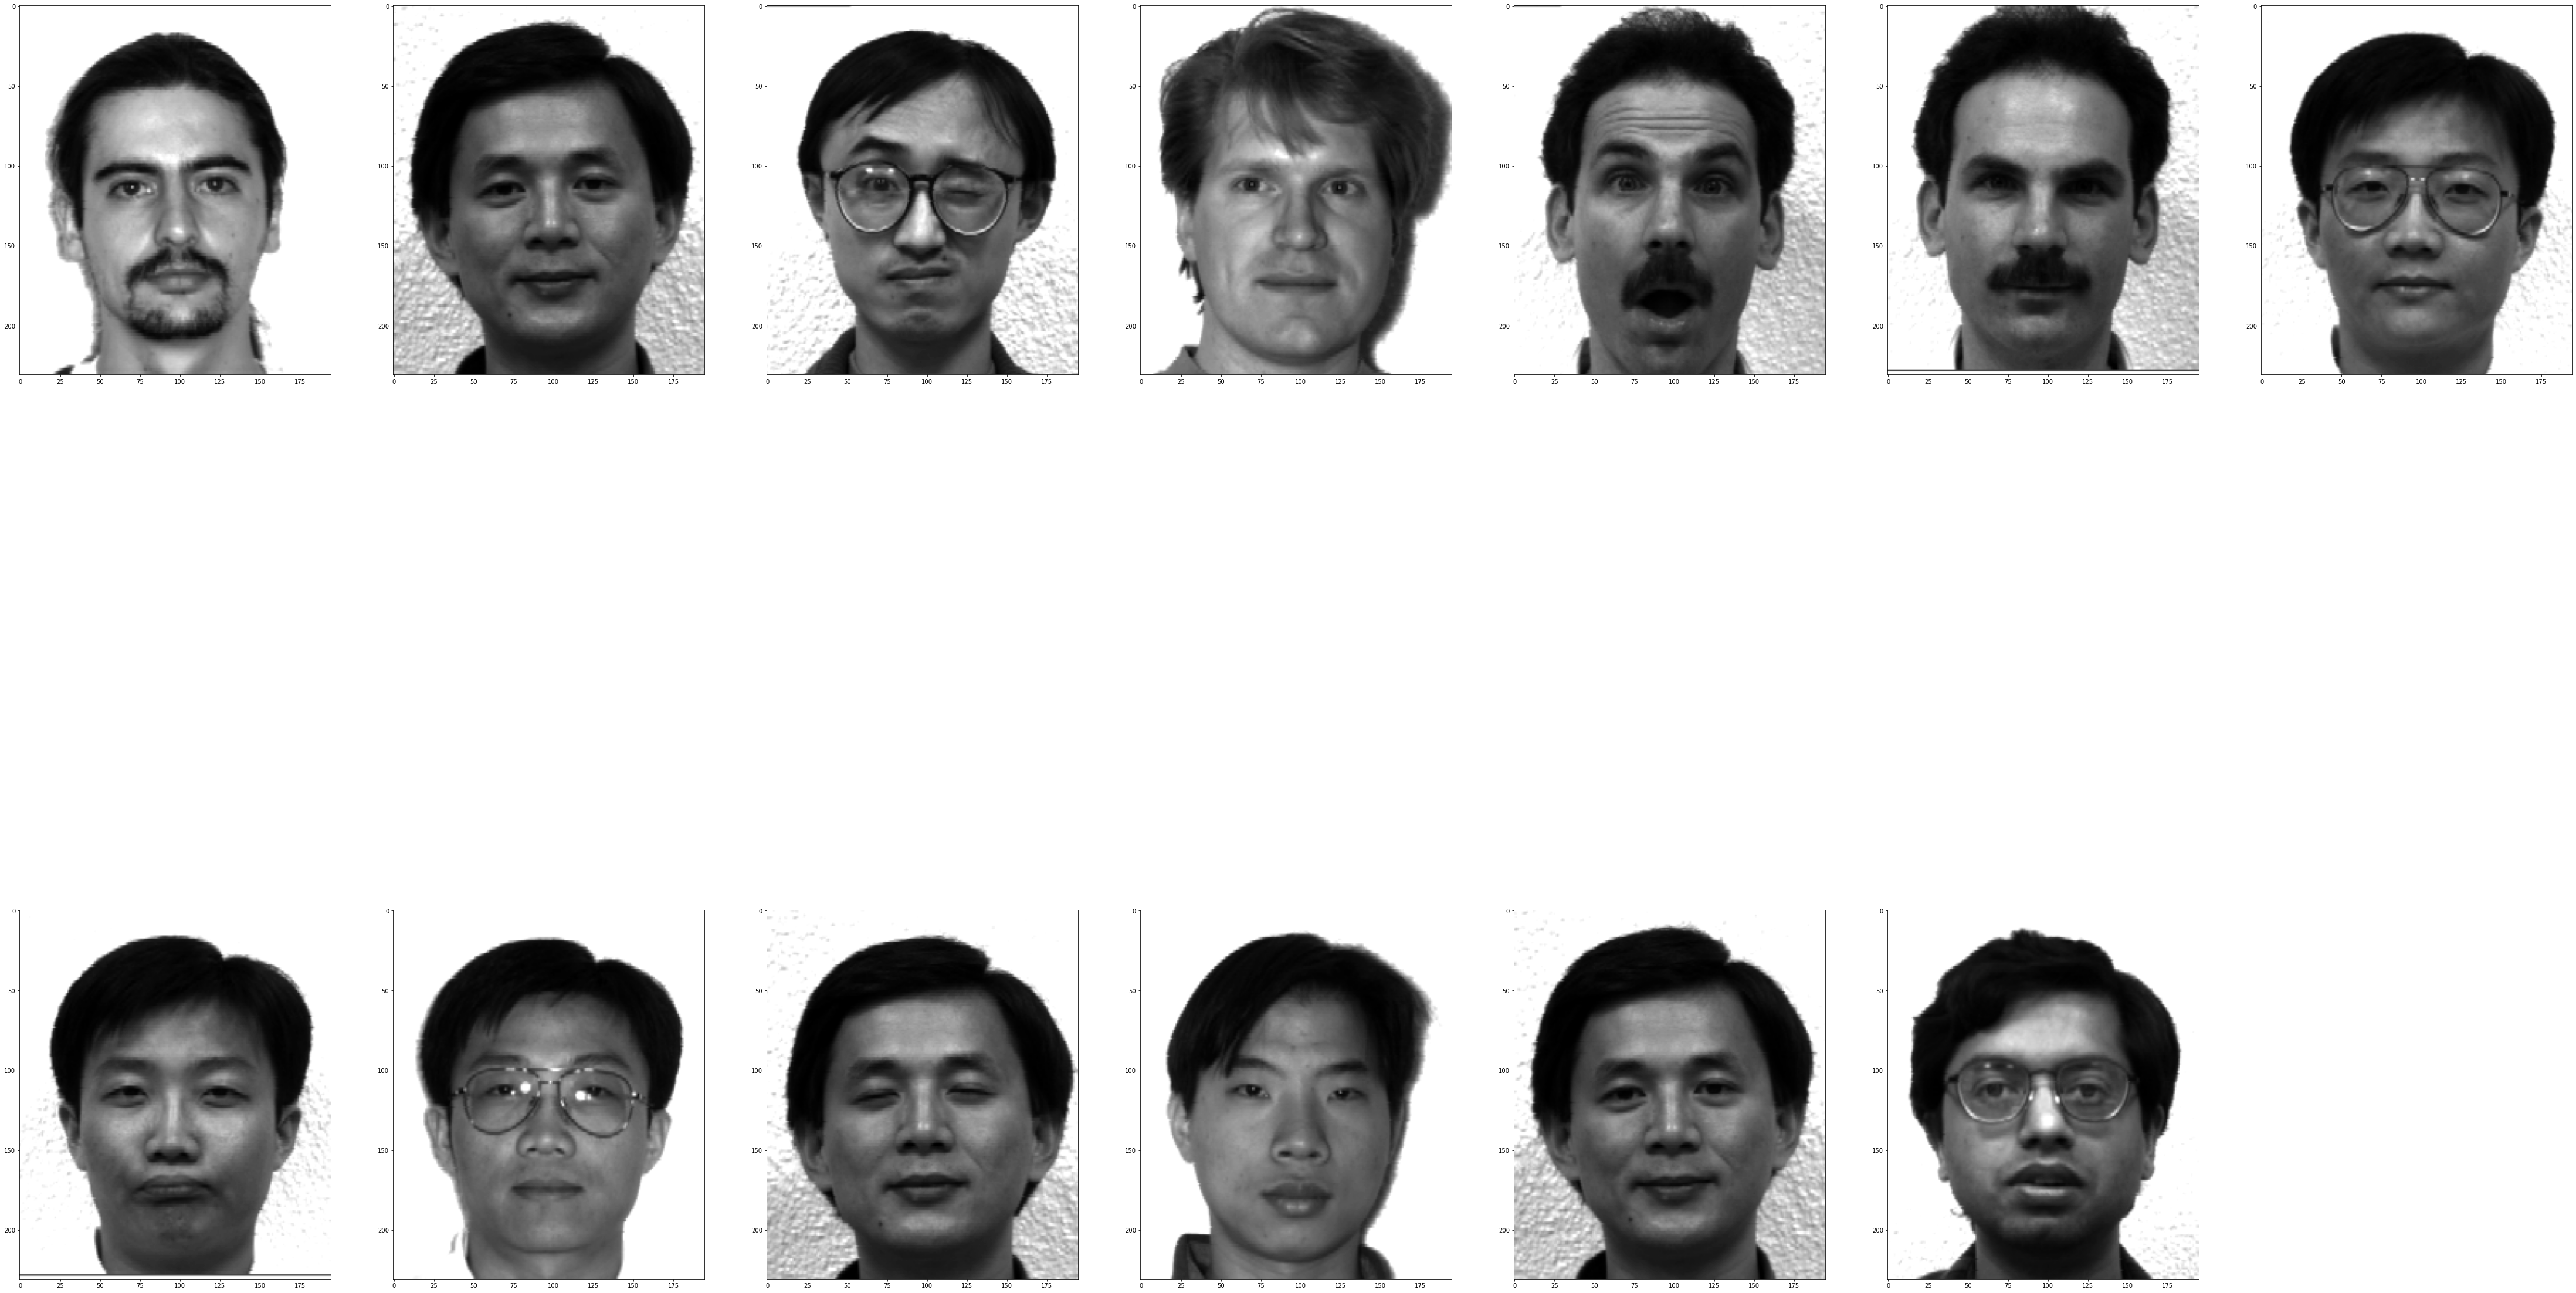

In [16]:
plotImages(images, values[2])